In [1]:
%matplotlib widget
import zarr_fuse as zf
import ipympl

# Import necessary libraries
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors
import contextily as ctx
import pyproj
import numpy as np

In [2]:
from hlavo_surface import inputs
work_dir = inputs.work_dir


root_node = zf.Node.read_store(work_dir / "surface.zarr")
fields = {
    'yr.no': ['air_temperature', 'precipitation_amount', 'relative_humidity']
}


#df_temp = root_node['yr.no'].read_df("air_temperature", date_time=slice(None))
#print(df_temp)
print(root_node['yr.no'].dataset.coords['date_time'])

<xarray.DataArray 'date_time' (date_time: 92)> Size: 736B
array(['2025-05-02T14:00:00.000000000', '2025-05-02T15:00:00.000000000',
       '2025-05-02T16:00:00.000000000', '2025-05-02T17:00:00.000000000',
       '2025-05-02T18:00:00.000000000', '2025-05-02T19:00:00.000000000',
       '2025-05-02T20:00:00.000000000', '2025-05-02T21:00:00.000000000',
       '2025-05-02T22:00:00.000000000', '2025-05-02T23:00:00.000000000',
       '2025-05-03T00:00:00.000000000', '2025-05-03T01:00:00.000000000',
       '2025-05-03T02:00:00.000000000', '2025-05-03T03:00:00.000000000',
       '2025-05-03T04:00:00.000000000', '2025-05-03T05:00:00.000000000',
       '2025-05-03T06:00:00.000000000', '2025-05-03T07:00:00.000000000',
       '2025-05-03T08:00:00.000000000', '2025-05-03T09:00:00.000000000',
       '2025-05-03T10:00:00.000000000', '2025-05-03T11:00:00.000000000',
       '2025-05-03T12:00:00.000000000', '2025-05-03T13:00:00.000000000',
       '2025-05-03T14:00:00.000000000', '2025-05-03T15:00:00.00000

/home/jb/workspace/zarr_fuse/zarr_fuse/zarr_storage.py:461: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  ds = xr.open_zarr(self.store, group=rel_path)
/home/jb/workspace/zarr_fuse/zarr_fuse/zarr_storage.py:461: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly

/home/jb/workspace/zarr_fuse/zarr_fuse/zarr_storage.py:461: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  ds = xr.open_zarr(self.store, group=rel_path)
/home/jb/workspace/zarr_fuse/zarr_fuse/zarr_storage.py:461: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly

Coord: date_time, ('date_time',)
Coord: lat_lon, ('lat_lon',)
Read DF: ['air_temperature', 'precipitation_amount', 'relative_humidity'], dimss: {'date_time', 'latitude', 'longitude'}
8280


/home/jb/workspace/zarr_fuse/zarr_fuse/plot/plot_map_view.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_selected['x'], self.df_selected['y'] = zip(
/home/jb/workspace/zarr_fuse/zarr_fuse/plot/plot_map_view.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_selected['x'], self.df_selected['y'] = zip(


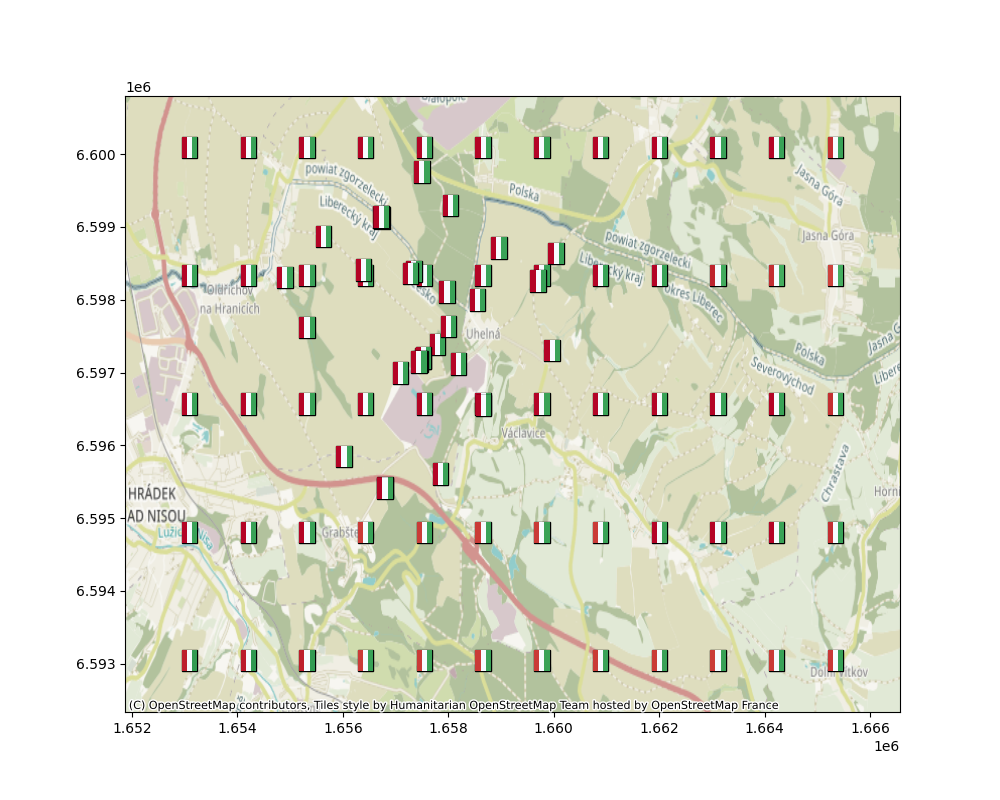

In [3]:
import matplotlib.pyplot as plt
# Create an instance of the InteractiveMapPlotter
node_path = 'yr.no'
node = root_node[node_path]
ds = node.dataset
overview = zf.plot.build_overview(root_node)
full_coords = overview[node_path].cumul_coordinates
mid_date_time = full_coords['date_time'].quantile(
            0.5,                     # 50 % quantile = median
            method="nearest"         # or "linear", "midpoint", …
).item() 
#print(mid_date_time)

mid_lat_lon = full_coords['lat_lon'][0]
point_ds = ds.sel(lat_lon=mid_lat_lon)

handlers = []
data_selector = {
    'date_time': 'time_axis',
    'longitude': 'lon_axis',
    'latitude': 'lat_axis',
    'air_temperature': plt.cm.coolwarm,  # Temperature: cool-to-warm colors
    'precipitation_amount': plt.cm.Blues,  # Precipitation: blues
    'relative_humidity': plt.cm.Greens,  # Humidity: greens
    #'wind_speed': plt.cm.Oranges,  # Wind speed: oranges
    #'insol': plt.cm.YlOrBr  # Insolation: yellow-orange-brown

    'time_point': None,
    'lon_point': None,
    'lat_point': None
}

df = node.read_df(fields[node_path], date_time=slice(None))
print(len(df))
plotter = zf.plot.InteractiveMapPlotter(df, data_selector, handlers)

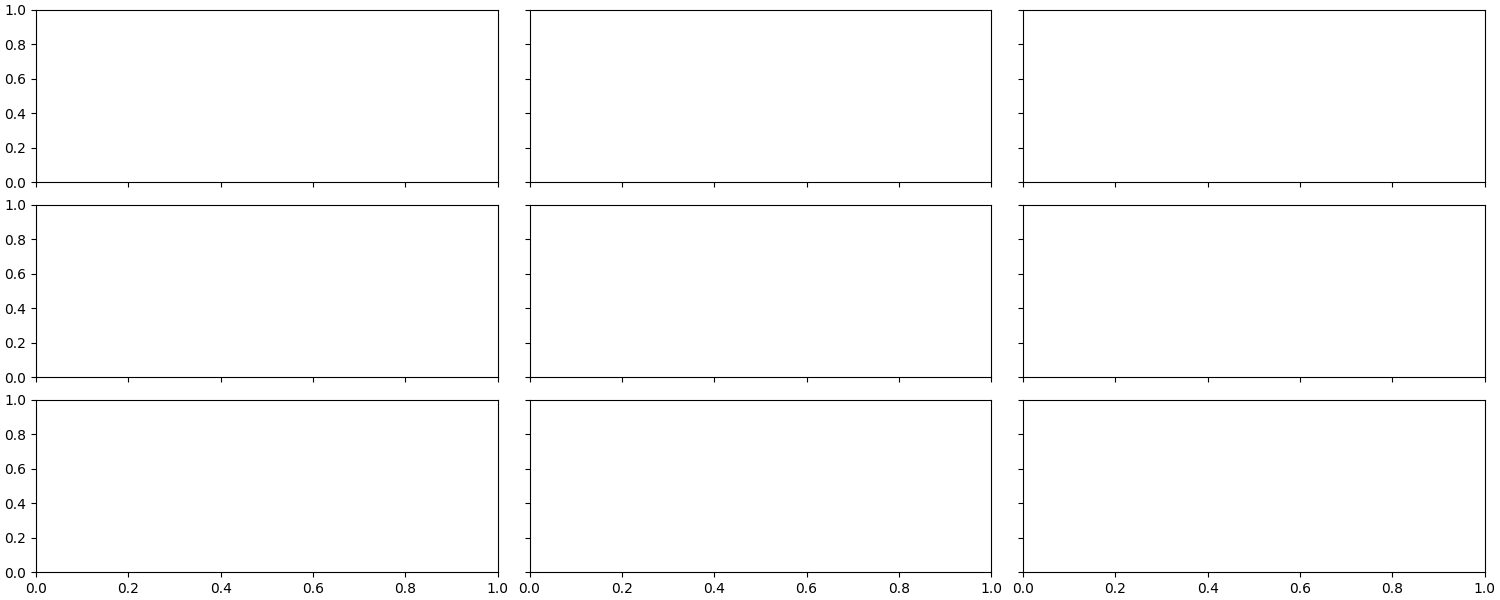

In [4]:

zf.plot.MultiZoomer(df, data_selector, handlers)
